In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
from patsy import dmatrices 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score 

In [107]:
dta = sm.datasets.fair.load_pandas().data


In [108]:
dta['affair'] = (dta.affairs > 0).astype(int) 


In [88]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affairs            6366 non-null float64
affair             6366 non-null int32
dtypes: float64(9), int32(1)
memory usage: 472.6 KB


In [103]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [104]:
# Every column is categorical and no missing data
for columns in dta.columns:
    print(columns,"-",len(dta[columns].unique()))

rate_marriage - 5
age - 6
yrs_married - 7
children - 6
religious - 4
educ - 6
occupation - 6
occupation_husb - 6
affairs - 77
affair - 2


In [133]:

for columns in dta.drop(columns =['affairs']).columns:
    print(columns)
    print(dta[columns].value_counts())

rate_marriage
5.0    2684
4.0    2242
3.0     993
2.0     348
1.0      99
Name: rate_marriage, dtype: int64
age
27.0    1931
22.0    1800
32.0    1069
42.0     793
37.0     634
17.5     139
Name: age, dtype: int64
yrs_married
2.5     2034
6.0     1141
16.5     818
23.0     811
9.0      602
13.0     590
0.5      370
Name: yrs_married, dtype: int64
children
0.0    2414
2.0    1481
1.0    1159
3.0     781
4.0     328
5.5     203
Name: children, dtype: int64
religious
3.0    2422
2.0    2267
1.0    1021
4.0     656
Name: religious, dtype: int64
educ
14.0    2277
12.0    2084
16.0    1117
17.0     510
20.0     330
9.0       48
Name: educ, dtype: int64
occupation
3.0    2783
4.0    1834
2.0     859
5.0     740
6.0     109
1.0      41
Name: occupation, dtype: int64
occupation_husb
4.0    2030
5.0    1779
2.0    1308
6.0     530
3.0     490
1.0     229
Name: occupation_husb, dtype: int64
affair
0    4313
1    2053
Name: affair, dtype: int64


In [126]:
dta.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'affair'],
      dtype='object')

In [109]:
encoded_df = pd.get_dummies(data=dta, columns=['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb'],drop_first=True)
encoded_df.columns

Index(['affairs', 'affair', 'rate_marriage_2.0', 'rate_marriage_3.0',
       'rate_marriage_4.0', 'rate_marriage_5.0', 'age_22.0', 'age_27.0',
       'age_32.0', 'age_37.0', 'age_42.0', 'yrs_married_2.5',
       'yrs_married_6.0', 'yrs_married_9.0', 'yrs_married_13.0',
       'yrs_married_16.5', 'yrs_married_23.0', 'children_1.0', 'children_2.0',
       'children_3.0', 'children_4.0', 'children_5.5', 'religious_2.0',
       'religious_3.0', 'religious_4.0', 'educ_12.0', 'educ_14.0', 'educ_16.0',
       'educ_17.0', 'educ_20.0', 'occupation_2.0', 'occupation_3.0',
       'occupation_4.0', 'occupation_5.0', 'occupation_6.0',
       'occupation_husb_2.0', 'occupation_husb_3.0', 'occupation_husb_4.0',
       'occupation_husb_5.0', 'occupation_husb_6.0'],
      dtype='object')

In [110]:
X= encoded_df.drop(columns = ['affairs', 'affair'])

In [111]:
X.shape

(6366, 38)

In [112]:
y=encoded_df['affair']

In [113]:
y.shape

(6366,)

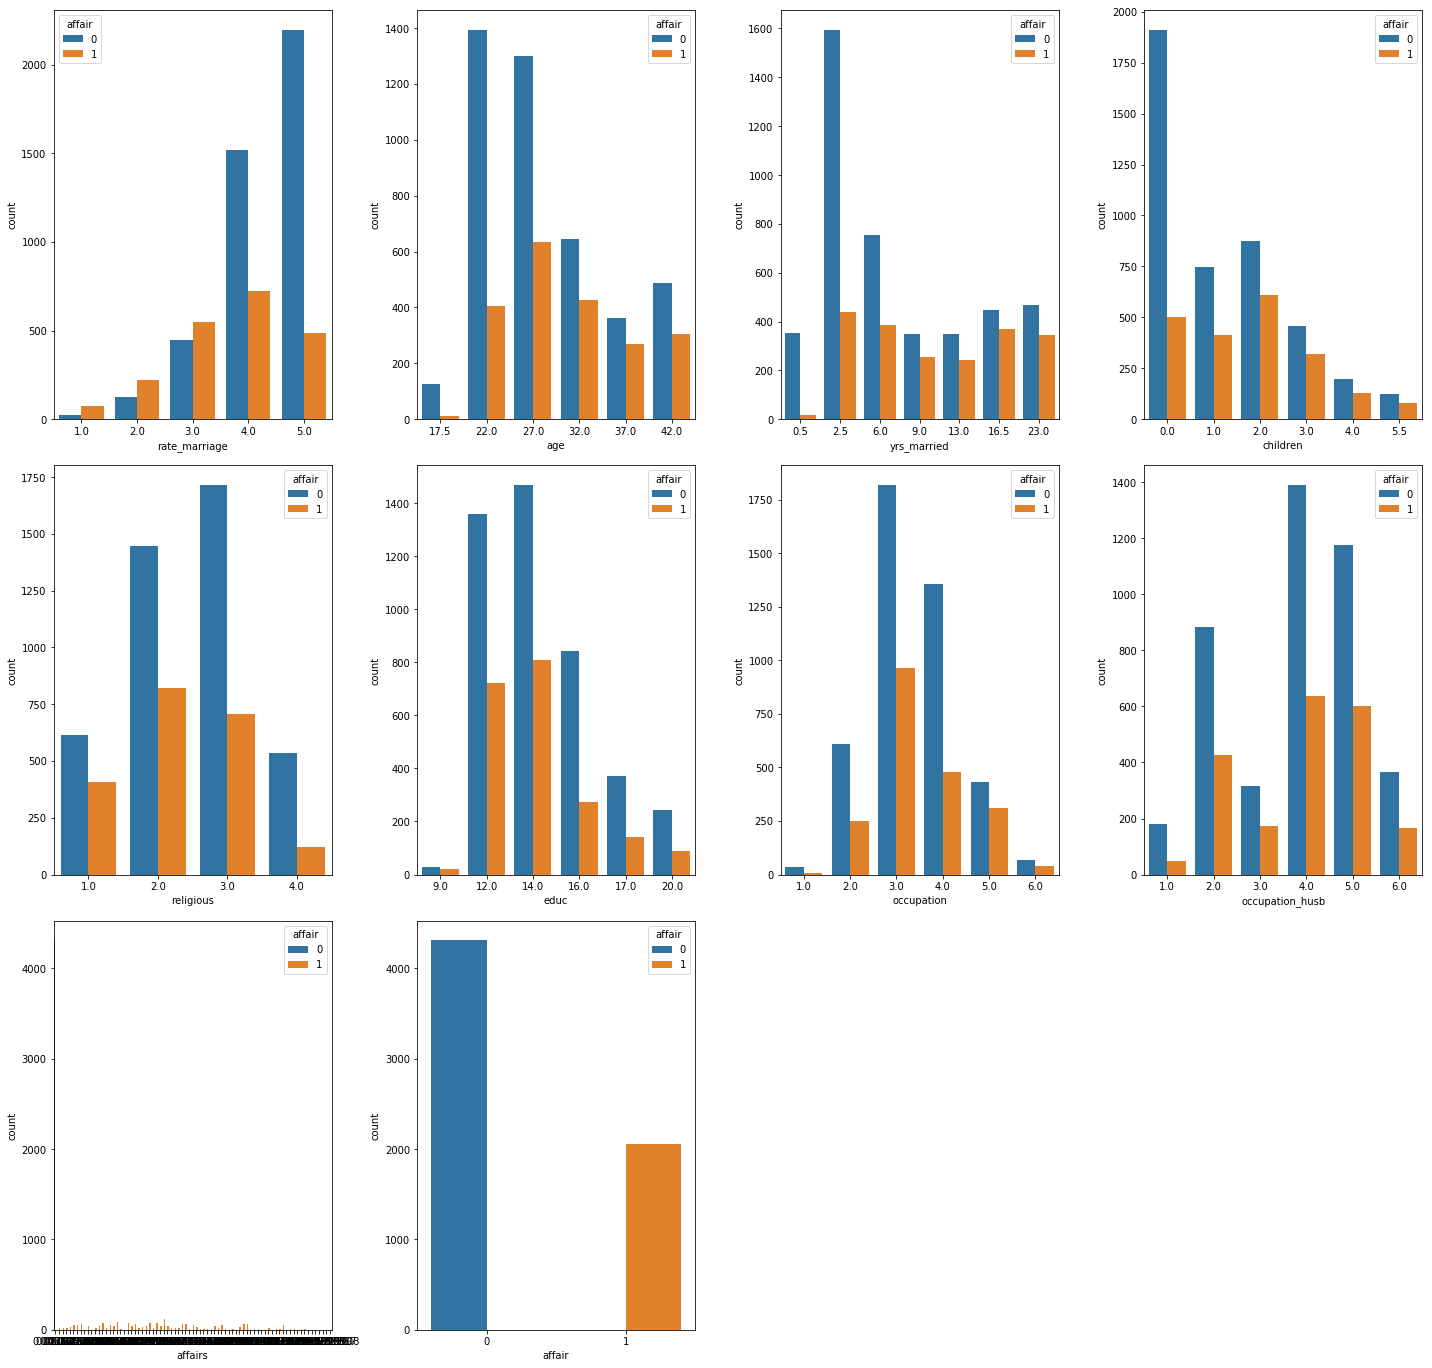

In [127]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in dta.columns:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.countplot(column,hue='affair',data=dta)
    plotnumber+=1
plt.tight_layout()

In [114]:
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

C:\Users\titan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\titan\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,4.309043,rate_marriage_2.0
1,9.409465,rate_marriage_3.0
2,15.555862,rate_marriage_4.0
3,16.571848,rate_marriage_5.0
4,10.733824,age_22.0
5,12.436978,age_27.0
6,10.263091,age_32.0
7,7.920168,age_37.0
8,11.477709,age_42.0
9,4.808692,yrs_married_2.5


In [116]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [117]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

C:\Users\titan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [118]:
y_pred = log_reg.predict(x_test)

In [119]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7217336683417085

In [63]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

C:\Users\titan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\titan\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [64]:
y_pred = log_reg.predict(x_test)

In [120]:
auc = roc_auc_score(y_test, y_pred)
auc

0.6319660342272714

In [128]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[954, 130],
       [313, 195]], dtype=int64)

In [129]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Precision = true_positive/(true_positive+false_positive)
Recall = true_positive/(true_positive+false_negative)
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8115695448745215

In [123]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

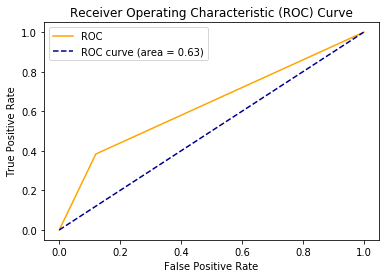

In [124]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [134]:
# auc is less lets try top one - hot coding and see if auc improves

In [135]:
#for simplicity we will take top 4 categorical values of each category

In [148]:
def one_hot_top_x(df,variable,top_x_labels):
    
    for label in top_x_labels:
        df[variable+'_'+str(label)] = np.where(df[variable]==label,1,0)
        

In [166]:
dta = sm.datasets.fair.load_pandas().data
dta['affair'] = (dta.affairs > 0).astype(int)
dta.drop(columns=['affairs','affair'],inplace=True)


In [154]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0


In [155]:
dta.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb'],
      dtype='object')

In [167]:
for columns in dta.columns:
    top_4=[x for x in dta[columns].value_counts().sort_values(ascending=False).head(4).index]
    dta=dta[dta[columns].isin(top_4)]
    one_hot_top_x(dta,columns,top_4)

In [157]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,rate_marriage_5.0,rate_marriage_4.0,...,educ_16.0,educ_17.0,occupation_3.0,occupation_4.0,occupation_2.0,occupation_5.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_2.0,occupation_husb_3.0
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,0,1,...,1,0,1,0,0,0,0,1,0,0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1,0,...,0,0,1,0,0,0,1,0,0,0
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,0,1,...,0,0,1,0,0,0,1,0,0,0
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [168]:
dta.drop(columns=['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb'],inplace=True)

In [169]:
dta.shape      #only 1 column reduced but half of data gone

(3331, 32)

In [171]:
dta=dta.join(y)

In [173]:
dta.head()

,rate_marriage_5.0,rate_marriage_4.0,rate_marriage_3.0,rate_marriage_2.0,age_27.0,age_22.0,age_32.0,age_42.0,yrs_married_2.5,yrs_married_6.0,...,educ_17.0,occupation_3.0,occupation_4.0,occupation_2.0,occupation_5.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_2.0,occupation_husb_3.0,affair
0,0,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1
2,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
5,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
8,0,0,1,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1


In [174]:
dta['affair'].value_counts()

0    2312
1    1019
Name: affair, dtype: int64

In [175]:
X=dta.drop(columns=['affair'])

In [176]:
y=dta['affair']

In [177]:
X_scaled = scalar.fit_transform(X)

C:\Users\titan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\titan\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [178]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,8714.535345,rate_marriage_5.0
1,3925.677498,rate_marriage_4.0
2,23364.602668,rate_marriage_3.0
3,6443.824742,rate_marriage_2.0
4,24622.602862,age_27.0
5,10386.812663,age_22.0
6,14204.463630,age_32.0
7,35138.090805,age_42.0
8,16049.378378,yrs_married_2.5
9,271895.093742,yrs_married_6.0


In [179]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355) 

In [180]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

C:\Users\titan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [181]:
y_pred = log_reg.predict(x_test)

In [182]:
auc = roc_auc_score(y_test, y_pred)
auc

0.6132254802831143

In [ ]:
#lesser auc and top one hot encoding does not works fine.we will stick to one hot encoding